In [36]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
from tabulate import tabulate
from os import path
from scipy.signal import find_peaks
from sklearn.model_selection import train_test_split

from spectrum import Spectrum
from common import list_files, DATA_FOLDER, tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [39]:
class DibProfile(Spectrum):
    def __init__(self, target, wavelength, flux):
        super().__init__(target, wavelength, flux)

    def center(self, central_wavelength: float = None):
        central_wavelength = central_wavelength or self.wavelength[np.argmin(self.flux)]
        return CenteredDibProfile(self.target, self.wavelength - central_wavelength, self.flux, central_wavelength)

class CenteredDibProfile(Spectrum):
    def __init__(self, target, wavelength, flux, central_wavelength):
        super().__init__(target, wavelength, flux)

        self.central_wavelength = central_wavelength

    def plot(self, ax: plt.Axes, draw_central_wavelength=True, title: str = None, x_label: str = None, y_label: str = None):
        super().plot(ax, title or rf'$\lambda=${self.central_wavelength:4g} Å', x_label or 'Distance to center [Å]', y_label)

        if draw_central_wavelength:
            ax.plot(0, self.flux[self.wavelength == 0], '.', ms=5, color='orange', label='DIB center')
            ax.legend()



Reading DIBs:   0%|          | 0/165 [00:00<?, ?it/s]

Reading DIBs: 100%|██████████| 165/165 [00:00<00:00, 4416.78it/s]


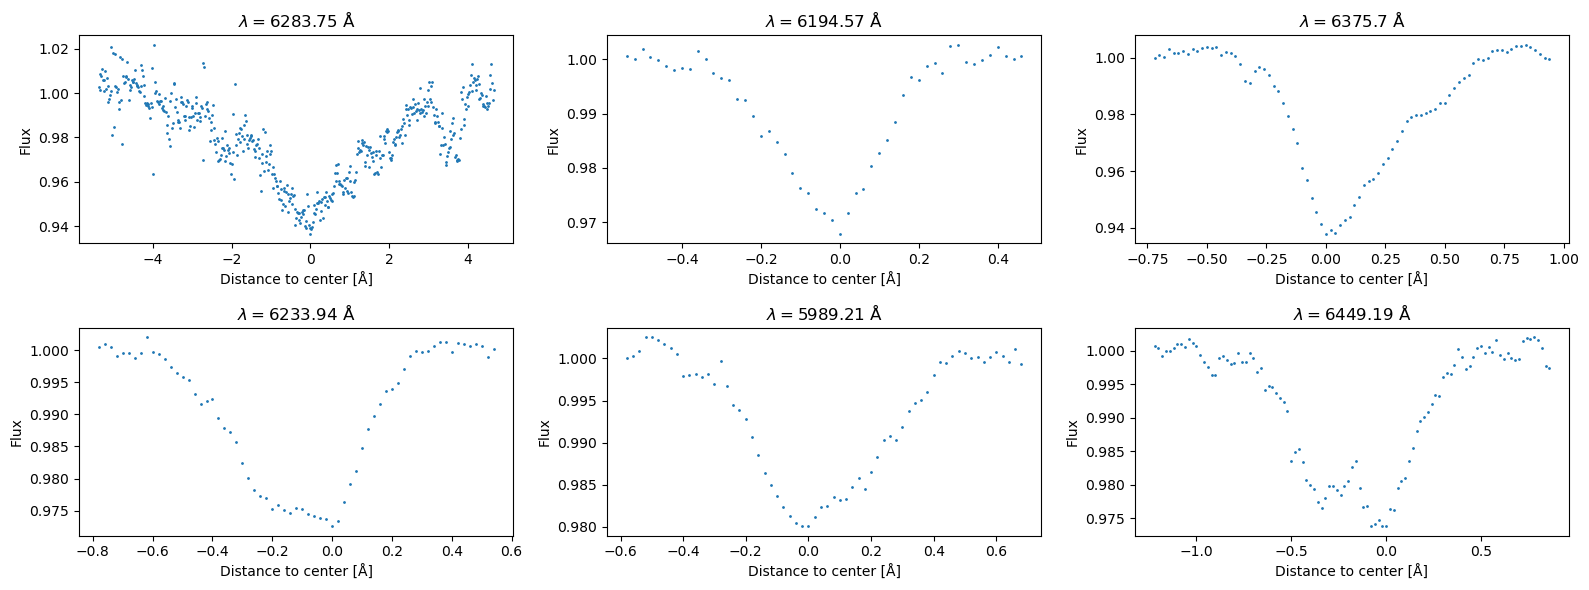

In [54]:
from common import OUTPUT_FOLDER


def load_dib_profile(datafile: str, target: str):
    wvl, flux = np.loadtxt(datafile, unpack=True)
    return DibProfile(target, wvl, flux)

target_name = 'HD185859'
dibs = np.array([load_dib_profile(datafile, target_name).center() for datafile in tqdm(list_files(path.join(DATA_FOLDER, target_name)), 'Reading DIBs')])

dibs_sample = dibs[[9, 4, 12, 18, 3, 6]]
ncols = 3
nrows = int(np.ceil(len(dibs_sample) / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3 * nrows))

for dib, ax in zip(dibs_sample, axes.flatten()):
    dib.plot(ax, draw_central_wavelength=False)

fig.tight_layout()
fig.savefig(path.join(OUTPUT_FOLDER, 'dibs_sample.pdf'))

In [ ]:
training_dibs, test_dibs = train_test_split(dibs, test_size=0.3)

[array([2, 5, 6]), array([3, 1])]